# Implementation of Lorentz Attracotr by Euler method_Python coding 

## Introduction

In 1963, Edward Lorenz developed a simple mathematical model of the way air moves around in the atmosphere. His model was a system of three ordinary differential equations (ODE) that demonstrate deterministic chaos at certain parameter values and initial conditions. The Lorentz attractor is the system's strange attractor that resembles a butterfly when visualized.
The Lorenz system is nonlinear, three-dimensional, and deterministic. The Lorentz attractor is a set of chaotic solutions of the Lorentz system and is possibly the most famous depiction of a system that exibits chaotic behavior. Very slight changes to the initial conditions of the system lead to wildly different solutions. The system itself describes the movement of a point in a three-dimensional space over time. The system is formally described by three ordinary differential equations that represent the movement of this point (x, y, z).

$ \frac{dx}{dt} = \sigma (y - x)   $                      

$ \frac{dy}{dt} = x (\rho - z) - y $

$ \frac{dz}{dt} = x y - \beta z    $               

In this project Euler approach is implemented for solving above equations. By Euler approach and considering a uniform sampling with dt sampling width and N as sampling number,  we can turn above equations to following form:

    x[i]=dt*sigma*(y[i-1]-x[i-1]) + x[i-1]
    y[i]=dt*x[i-1]*(rho-z[i-1]) - y[i-1]*(dt-1)
    z[i]=dt*x[i-1]*y[i-1]-dt*beta*z[i-1] + z[i-1]
    
Then by taking initial points as x[0],y[0],z[0] we can solve above differential equations numerically. 

Here 3 differential equations are numerically solved for the 5 following test cases:
    
$test-case-01:\sigma$ =10 , $\beta$ =8/3  , $\rho$ =6

$test-case-02:\sigma$ =10 , $\beta$ =8/3  , $\rho$ =16

$test-case-03:\sigma$ =10 , $\beta$ =8/3  , $\rho$ =28

$test-case-04:\sigma$ =14 , $\beta$ =8/3  , $\rho$ =28

$test-case-05:\sigma$ =14 , $\beta$ =13/3 , $\rho$ =28


#### Code description
code is explained module by module:
* Importing libraries
* Opening "Saeid_Aalborg_Project" folder as output folder for saving results
* Opening readme.txt file in the output folder with some explanation about code.
* Solving Lorentz Attractor numerically. In this section 3 differential equations are solved numerically by Euler approach. In the begining of this module initial point (x[0],y[0],z[0]) and sampling condition are introduced. Initial point is introduced as IP and sampling condition composed of dt and N. dt is sampling width and N is number of sampling. 
    * We can change initial point and sampling condition but numerical solution don't work with all possible values. It is recomended to stay below 0.02 for dt and higher than 1000 for N. 
    * Numerical solution is tested by the 5 test cases.
* Testing
    * In this part we want to test implemented step width (dt) for solving and plotting.
    * If implemented step width result in less than 100 numerical solutions for any of 5 test-cases then code will show error. But if we have more than 100 numerical solutions then codes go well and confirmation message will show up
* 3D plots of numerically calculated results for the 5 test cases. All plots are saved in output folder.
* 2D plots of numerically calculated results for the 5 test cases. All plots are saved in output folder
* Some conclusions are discussed at the end.


#### Test Plan
Testing could be performed by running code in Jupyter module by module or by running test.py file in Terminal. Following initial values are implemented:
dt=0.005 -- N=20000 -- IP=(1., 1., 1.)


In [1]:
import sympy as sy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from scipy.integrate import odeint
from mpl_toolkits.mplot3d.axes3d import Axes3D

from matplotlib.pyplot import *
from pylab import rcParams
rcParams['figure.figsize'] = 12, 6
matplotlib.rcParams.update({'font.size': 15})

In [2]:
##################################################################################
###################### Create a folder for storing project results ###############

import os
path1 = os.getcwd()
print ("current working directory is:\n%s" % path1,'\n')
directory = "Saeid_Aalborg_Project"
parent_dir = path1
path2 = os.path.join(parent_dir, directory)

if not os.path.exists(directory):
    os.makedirs(directory)
    print('output folder is created and saving data address is\n',path2)
    os.chdir(path2)
else:
    print('output folder is created before and saving data address is\n',path2)
    os.chdir(path2)


current working directory is:
/home/conda/notebooks/Aalborg.Pyth.Proje 

output folder is created before and saving data address is
 /home/conda/notebooks/Aalborg.Pyth.Proje/Saeid_Aalborg_Project


In [3]:
########### Create readme.txt file to explain software algorithm and its output ############

os.chdir(path2)
file = open("readme.txt", "w") 
file.write("This software is for solving Lorentz attractor Ordinary Differential Equations"
          "\n by Euler approach. Numerical results are plotted and saved in PDF files for the" 
          "\n 5 test cases. There is testing section for code. If implemented step wise for numerically"
          "\n solving the equation result in less than 100 solution for any of test cases then an error"
           "\nwill show up in testing section. Otherwise everything goes well. Please check output folder"
           "\nsaved output results.\n\n")
           
file.close()

## Solving Lorentz attractor numerically by Euler approach

In [4]:
###############################################################################    
############  Code for Lorentz attractor by Euler method   ############

dt = 0.015             ## step width for solving and drawing
N = 5000             ## Number of points
IP=[1., 1., 1.]        ## Initial Point


def lorentz(x, y, z, sigma, beta, rho):
    '''
    Given:
       x, y, z: a point of interest in three dimensional space
       s, r, b: parameters defining the lorenz attractor
    Returns:
       x_dot, y_dot, z_dot: values of the lorenz attractor's partial
           derivatives at the point x, y, z
    '''
    xt = sigma*(y - x)
    yt = rho*x - y - x*z
    zt = x*y - beta*z
    return xt, yt, zt

### Numerical solution is performed for 5 test cases mentioned in the introduction so 5 set of
###     arrays for x,y,z are created.     
xs1=np.zeros(N+1)
ys1=np.zeros(N+1)
zs1=np.zeros(N+1)

xs2=np.zeros(N+1)
ys2=np.zeros(N+1)
zs2=np.zeros(N+1)

xs3=np.zeros(N+1)
ys3=np.zeros(N+1)
zs3=np.zeros(N+1)

xs4=np.zeros(N+1)
ys4=np.zeros(N+1)
zs4=np.zeros(N+1)

xs5=np.zeros(N+1)
ys5=np.zeros(N+1)
zs5=np.zeros(N+1)

###  Considering 5 test cases we need a set of initial values for each of them. Here all of them 
###        are equal to each other. IP means initial points that introduced before
xs1[0],ys1[0],zs1[0]=xs2[0],ys2[0],zs2[0]=xs3[0],ys3[0],zs3[0]=xs4[0],ys4[0],zs4[0]=xs5[0],ys5[0],zs5[0]=IP


###   Differential equation is solved numerically and point by point. Considering 5 test cases
###        there are 5 solutions

for i in range(N):
    xt, yt, zt = lorentz(xs1[i], ys1[i], zs1[i], 10, 8./3., 6)
    xs1[i+1] = xs1[i] + (xt * dt)
    ys1[i+1] = ys1[i] + (yt * dt)
    zs1[i+1] = zs1[i] + (zt * dt)

for i in range(N):
    xt, yt, zt = lorentz(xs2[i], ys2[i], zs2[i], 10, 8./3., 16)
    xs2[i+1] = xs2[i] + (xt * dt)
    ys2[i+1] = ys2[i] + (yt * dt)
    zs2[i+1] = zs2[i] + (zt * dt)

for i in range(N):
    xt, yt, zt = lorentz(xs3[i], ys3[i], zs3[i], 10, 8./3., 28)
    xs3[i+1] = xs3[i] + (xt * dt)
    ys3[i+1] = ys3[i] + (yt * dt)
    zs3[i+1] = zs3[i] + (zt * dt)

    
for i in range(N):
    xt, yt, zt = lorentz(xs4[i], ys4[i], zs4[i], 14, 8./3., 28)
    xs4[i+1] = xs4[i] + (xt * dt)
    ys4[i+1] = ys4[i] + (yt * dt)
    zs4[i+1] = zs4[i] + (zt * dt)
    
for i in range(N):
    xt, yt, zt = lorentz(xs5[i], ys5[i], zs5[i], 14, 13./3., 28)
    xs5[i+1] = xs5[i] + (xt * dt)
    ys5[i+1] = ys5[i] + (yt * dt)
    zs5[i+1] = zs5[i] + (zt * dt)


## Testing
in this section applied step width (dt) is tested and if applied dt result in less than 100 results in numerical solution of the 5 test cases then applied dt is not proper 

In [5]:
L11=0
def Count(list00):
    i1=0
    L01=len(list00)                        ## here we measure array size 
    global L11
    for i1 in range (L01):
        if list00[i1]<0 or list00[i1]>0:     ## we count number of numerical results derived 
            L11=L11+1                        ## for xs1, xs2, ..., xs5 based this issue that valid results are digits
        
    return L11

CountXS1=Count(xs1)
L11=0
CountXS2=Count(xs2)
L11=0
CountXS3=Count(xs3)
L11=0
CountXS4=Count(xs4)
L11=0
CountXS5=Count(xs5)

### These print commands show us number of numerical solutions for each of 5 test cases 
print('solutions for test_case_1=',CountXS1)
print('\nsolutions for test_case_2=',CountXS2)
print('\nsolutions for test_case_3=',CountXS3)
print('\nsolutions for test_case_4=',CountXS4)
print('\nsolutions for test_case_5=',CountXS5,'\n\n')

TestResult=0
if CountXS1<100 or CountXS2<100 or CountXS3<100 or CountXS4<100 or CountXS5<100:
    TestResult=0
else:
    TestResult=1

########################################
########## In this section if applied dt is correct and we have got more than 100 answers for numerical
########## solution of 5 test cases then everything is fine and we get confirmation. If sloving numerical 
########## solution for any of 5 test cases result in less than 100 solution then code show error and we
########## need to reduce dt value. (Recomendation: dt less than 0.02 is OK)
                
import unittest

def test():
    assert TestResult==1

if __name__ == "__main__":
    test()
    print("Applied step width (dt) is OK--Continue with plotting") 

solutions for test_case_1= 5001

solutions for test_case_2= 5001

solutions for test_case_3= 5001

solutions for test_case_4= 5001

solutions for test_case_5= 5001 


Applied step width (dt) is OK--Continue with plotting


## 3D results for the 5 test cases

test case-1    sigma=10, beta=8./3., rho=6  



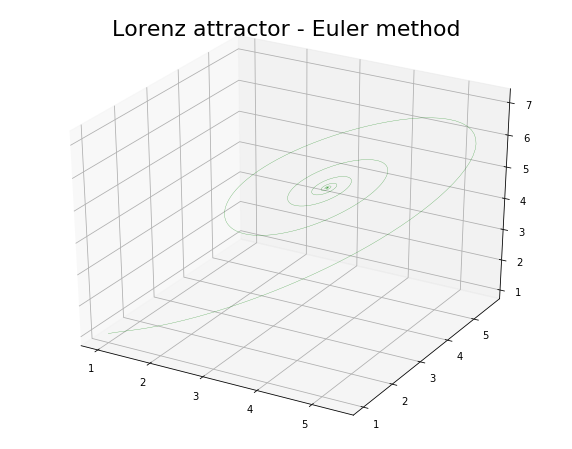

In [6]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
import matplotlib.font_manager as fm
rcParams['figure.figsize'] = 10, 8

###################### Test Case-1 (10, 8./3., 6) ###############
print('test case-1    sigma=10, beta=8./3., rho=6  \n')

gca(projection='3d')
plot(xs1, ys1, zs1, color='g', alpha=0.7, linewidth=0.3)    
plt.title('Lorenz attractor - Euler method', fontsize=22)
savefig( 'Lorentz Attractor-euler_3D-1.pdf', fmt='PDF', dpi=100)


test case-2    sigma=10, beta=8/3, rho=16  



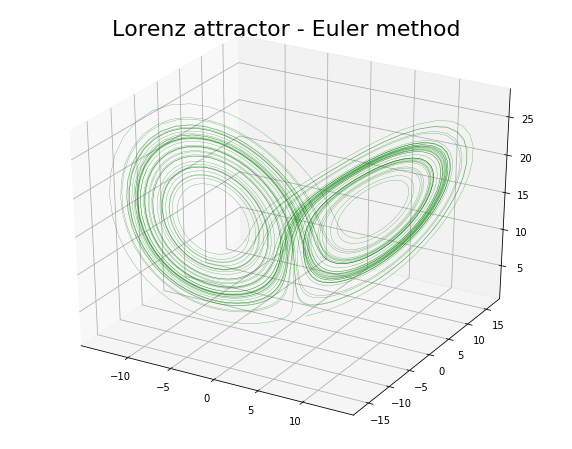

In [7]:
###################### Test Case-2 (10, 8/3, 16) ###############
print('test case-2    sigma=10, beta=8/3, rho=16  \n')

plt.figure()
gca(projection='3d')
plot(xs2, ys2, zs2, color='g', alpha=0.7, linewidth=0.3)
plt.title('Lorenz attractor - Euler method', fontsize=22)
savefig( 'Lorentz Attractor-euler_3D-2.pdf', fmt='PDF', dpi=100)


test case-3    sigma=10, beta=8/3, rho=28  



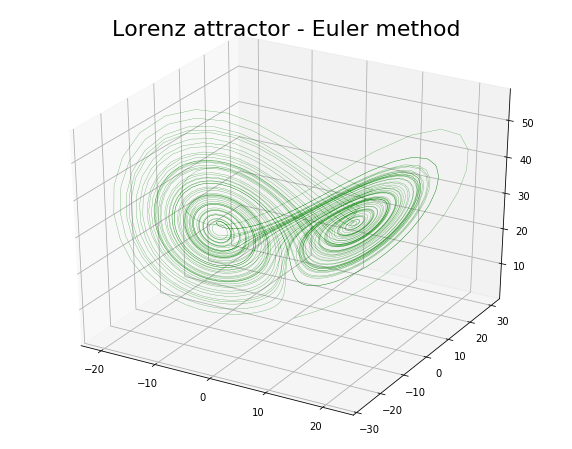

In [8]:
###################### Test Case-3 (10, 8/3, 28) ###############
print('test case-3    sigma=10, beta=8/3, rho=28  \n')

plt.figure()
gca(projection='3d')
plot(xs3, ys3, zs3, color='g', alpha=0.7, linewidth=0.3) 
plt.title('Lorenz attractor - Euler method', fontsize=22)
savefig( 'Lorentz Attractor-euler_3D-3.pdf', fmt='PDF', dpi=100)


test case-4    sigma=14, beta=8/3, rho=28  



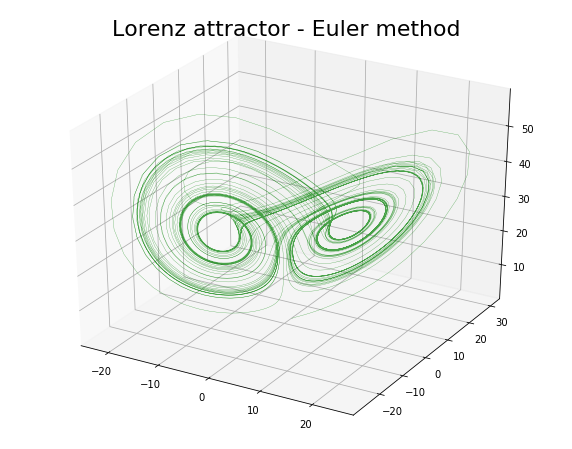

In [9]:
###################### Test Case-4 (14, 8/3, 28) ###############
print('test case-4    sigma=14, beta=8/3, rho=28  \n')

plt.figure()
gca(projection='3d')
plot(xs4, ys4, zs4, color='g', alpha=0.7, linewidth=0.3)
plt.title('Lorenz attractor - Euler method', fontsize=22)
savefig( 'Lorentz Attractor-euler_3D-4.pdf', fmt='PDF', dpi=100)


test case-5    sigma=14, beta=13/3, rho=28  



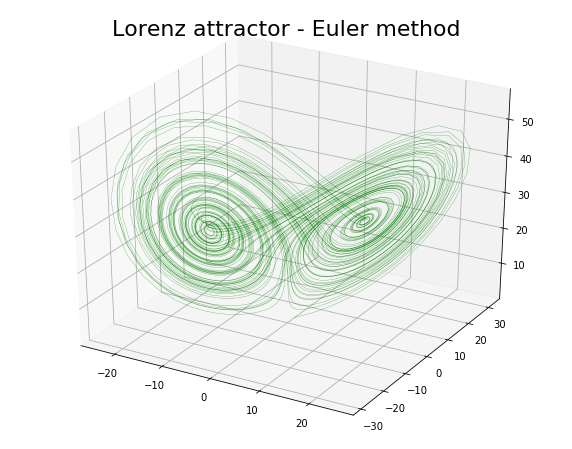

In [10]:
###################### Test Case-5 (14, 13/3, 28) ###############
print('test case-5    sigma=14, beta=13/3, rho=28  \n')

plt.figure()
gca(projection='3d')
plot(xs5, ys5, zs5, color='g', alpha=0.7, linewidth=0.3)
plt.title('Lorenz attractor - Euler method', fontsize=22)
savefig( 'Lorentz Attractor-euler_3D-5.pdf', fmt='PDF', dpi=100)


## 2D results for the 5 test cases

test case-1    sigma=10, beta=8/3, rho=6  



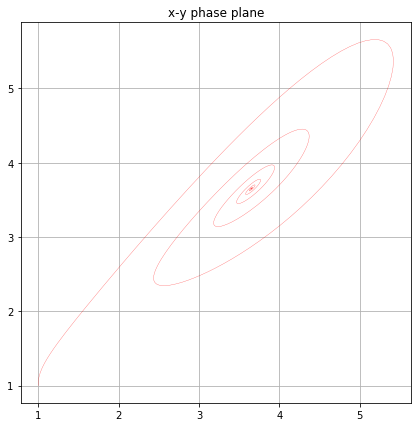

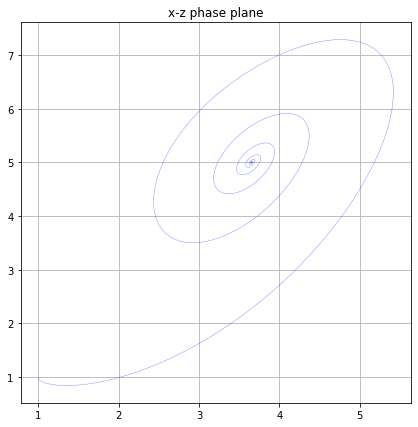

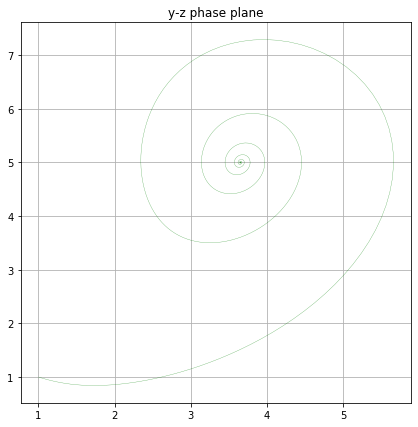

In [11]:
###################### Results of Test Case-1 (10, 8/3, 6) ###############
print('test case-1    sigma=10, beta=8/3, rho=6  \n')

# plot the x values vs the y values
rcParams['figure.figsize'] = 7, 7
plt.figure()
plot(xs1, ys1, color='r', alpha=0.7, linewidth=0.3)
title('x-y phase plane')
grid()
savefig( '2D-xy-1.pdf', fmt='PDF', dpi=100)

# plot the x values vs the z values
plt.figure()
plot(xs1, zs1, color='b', alpha=0.7, linewidth=0.3)
title('x-z phase plane')
grid()
savefig( '2D-xz-1.pdf', fmt='PDF', dpi=100)

# plot the y values vs the z values
plt.figure()
plot(ys1, zs1, color='g', alpha=0.7, linewidth=0.3)
title('y-z phase plane')
grid()
savefig( '2D-yz-1.pdf', fmt='PDF', dpi=100)


test case-2    sigma=10, beta=8/3, rho=16  



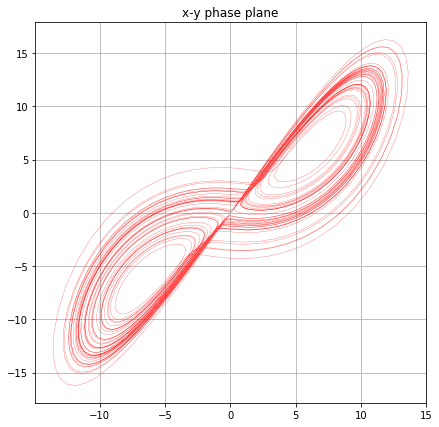

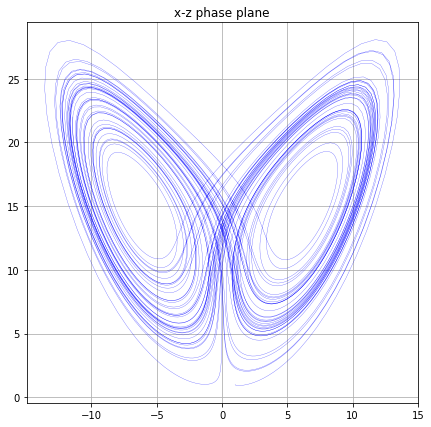

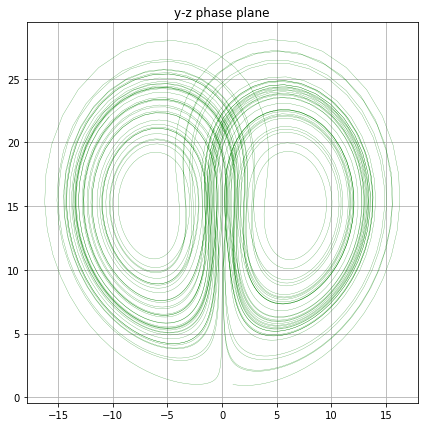

In [12]:
###################### Results of Test Case-2 (10, 8/3, 16) ###############
print('test case-2    sigma=10, beta=8/3, rho=16  \n')

plt.figure()
plot(xs2, ys2, color='r', alpha=0.7, linewidth=0.3)
title('x-y phase plane')
grid()
savefig( '2D-xy-2.pdf', fmt='PDF', dpi=100)

# plot the x values vs the z values
plt.figure()
plot(xs2, zs2, color='b', alpha=0.7, linewidth=0.3)
title('x-z phase plane')
grid()
savefig( '2D-xz-2.pdf', fmt='PDF', dpi=100)

# plot the y values vs the z values
plt.figure()
plot(ys2, zs2, color='g', alpha=0.7, linewidth=0.3)
title('y-z phase plane')
grid()
savefig( '2D-yz-2.pdf', fmt='PDF', dpi=100)


test case-3    sigma=10, beta=8/3, rho=28  



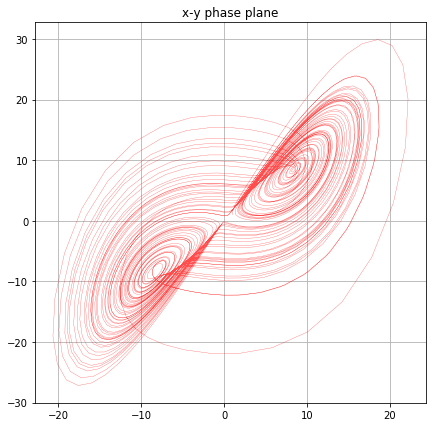

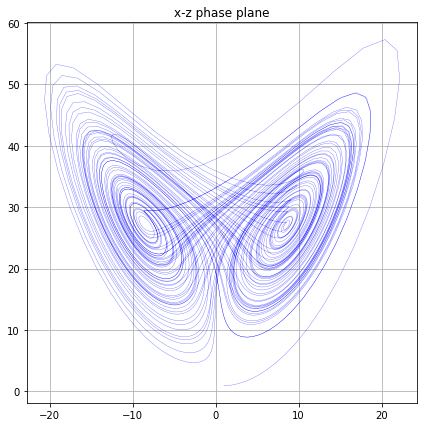

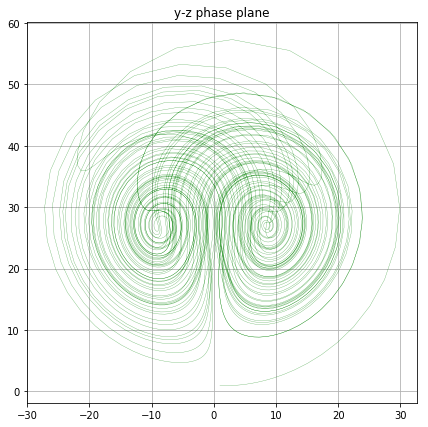

In [13]:
###################### Results of Test Case-3 (10, 8/3, 28) ###############
print('test case-3    sigma=10, beta=8/3, rho=28  \n')

plt.figure()
plot(xs3, ys3, color='r', alpha=0.7, linewidth=0.3)
title('x-y phase plane')
grid()
savefig( '2D-xy-3.pdf', fmt='PDF', dpi=100)

# plot the x values vs the z values
plt.figure()
plot(xs3, zs3, color='b', alpha=0.7, linewidth=0.3)
title('x-z phase plane')
grid()
savefig( '2D-xz-3.pdf', fmt='PDF', dpi=100)

# plot the y values vs the z values
plt.figure()
plot(ys3, zs3, color='g', alpha=0.7, linewidth=0.3)
title('y-z phase plane')
grid()
savefig( '2D-yz-3.pdf', fmt='PDF', dpi=100)


test case-4    sigma=14, beta=8/3, rho=28  



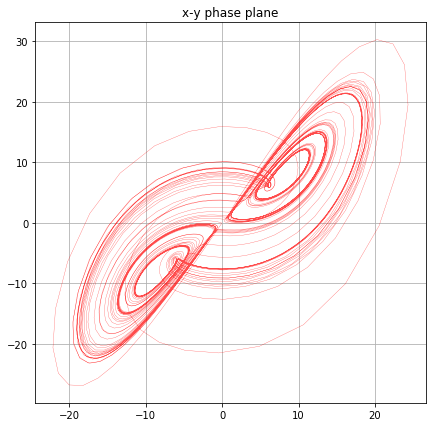

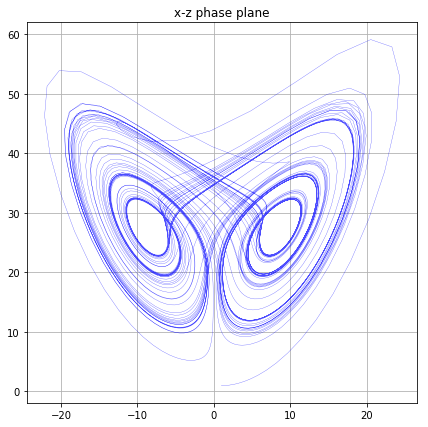

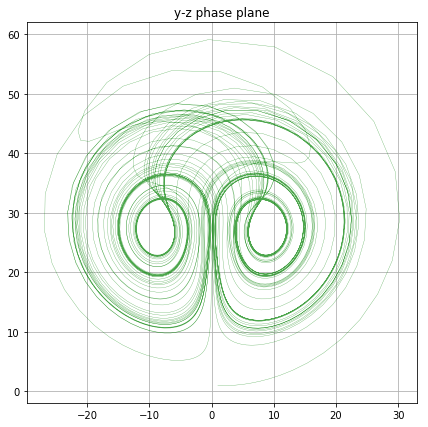

In [14]:
###################### Results of Test Case-4 (14, 8/3, 28) ###############
print('test case-4    sigma=14, beta=8/3, rho=28  \n')

plt.figure()
plot(xs4, ys4, color='r', alpha=0.7, linewidth=0.3)
title('x-y phase plane')
grid()
savefig( '2D-xy-4.pdf', fmt='PDF', dpi=100)

# plot the x values vs the z values
plt.figure()
plot(xs4, zs4, color='b', alpha=0.7, linewidth=0.3)
title('x-z phase plane')
grid()
savefig( '2D-xz-4.pdf', fmt='PDF', dpi=100)

# plot the y values vs the z values
plt.figure()
plot(ys4, zs4, color='g', alpha=0.7, linewidth=0.3)
title('y-z phase plane')
grid()
savefig( '2D-yz-4.pdf', fmt='PDF', dpi=100)


test case-5    sigma=14, beta=13/3, rho=28  



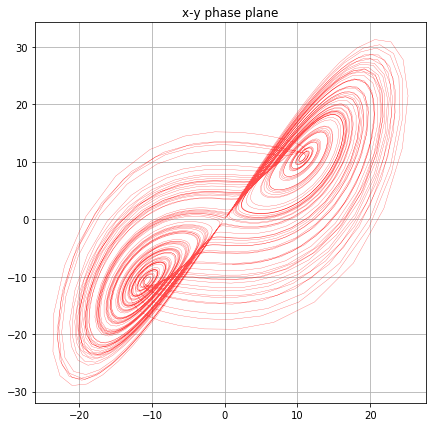

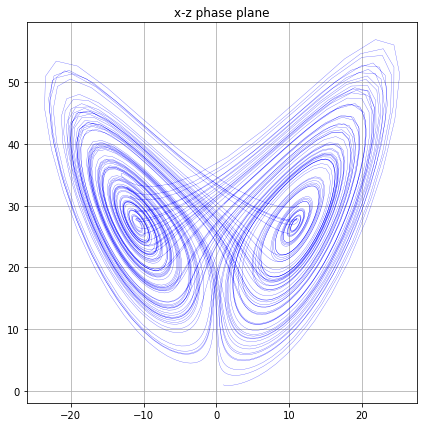

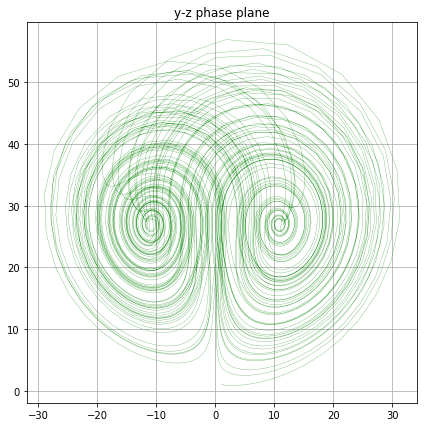

In [15]:
###################### Results of Test Case-5 (14, 13/3, 28) ###############
print('test case-5    sigma=14, beta=13/3, rho=28  \n')

plt.figure()
plot(xs5, ys5, color='r', alpha=0.7, linewidth=0.3)
title('x-y phase plane')
grid()
savefig( '2D-xy-5.pdf', fmt='PDF', dpi=100)

# plot the x values vs the z values
plt.figure()
plot(xs5, zs5, color='b', alpha=0.7, linewidth=0.3)
title('x-z phase plane')
grid()
savefig( '2D-xz-5.pdf', fmt='PDF', dpi=100)

# plot the y values vs the z values
plt.figure()
plot(ys5, zs5, color='g', alpha=0.7, linewidth=0.3)
title('y-z phase plane')
grid()
savefig( '2D-yz-5.pdf', fmt='PDF', dpi=100)


In [16]:
class MyTest(unittest.TestCase):
    def test(self):
        self.assertEqual(add(3,4), 7)

if __name__ == '__main__':
    unittest.main()

E
ERROR: /Users/saeidpirani/Library/Jupyter/runtime/kernel-f40ae96f-4a5c-44e5-add2-a58bc73feb8c (unittest.loader._FailedTest)
----------------------------------------------------------------------
AttributeError: module '__main__' has no attribute '/Users/saeidpirani/Library/Jupyter/runtime/kernel-f40ae96f-4a5c-44e5-add2-a58bc73feb8c'

----------------------------------------------------------------------
Ran 1 test in 0.001s

FAILED (errors=1)


SystemExit: True

/Users/saeidpirani/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3304: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [17]:
print('Numerical calculation and plotting of results are done. Please go to' 
      ' "Saeid_Aalborg_Project" folder and check output plots')

Numerical calculation and plotting of results are done. Please go to "Saeid_Aalborg_Project" folder and check output plots


## Conclusion

#### Initial conditions:
Lorentz Attractor numerical solution is sensitive on initial condition (also known as the butterfly effect).

Some initial point with valid numerical solution for all the 5 test cases are:

(x[0], y[0], z[0]): (1 , 0, 0) - (0 , 1, 0) - (1 , 0, 1) - (0, 1, 1) - (1, 1, 1) - (1, 1, 2)

Implementation of different initial points shows numerical result difference is not just in the start point of out put graphs. Different initial point change numerical result. The phenomenon we observe is a natural outcome of applying approximate solution methods to a system like the Lorentz Attractor that exhibits sensitive dependence on initial conditions. Sensitive dependence on initial conditions means that if you take two nearby points 𝑝1,𝑞1 and regard them as initial conditions for two solutions at time 𝑡1, and then you flow along those solutions curves to points 𝑝2,𝑞2 at some time 𝑡2, the points 𝑝2,𝑞2 will almost certainly be farther apart than the initial points 𝑝1,𝑞1 were.

* Above code is tested by some typical values for dt and N. 
    + Changing N will only change number of points of the numerical results for a fixed sampling step (dt). 
    + Testing different values for dt shows that reducing dt value does not always result in more numerical results. In some cases reducing dt will result in loosing some of numerical results. It is better to set dt on values less than 0.02